In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from qutip import Qobj, spre, spost, qeye, sigmax, sigmay, sigmaz, qpt
from scipy.linalg import expm

I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
S = np.array([[1, 0], [0, 1j]])
S_dagger = S.conj().T

II = np.kron(I, I)
XX = np.kron(X, X)
YY = np.kron(Y, Y)
ZZ = np.kron(Z, Z)

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "text.usetex": True, # Remove this line if your code doesn't run/ take too long
    "font.family": "serif",
    "figure.dpi": 100,
    "font.size": 14
})

In [2]:
# --- Pauli basis for QPT --- #
pauli_basis = [qeye(2), sigmax(), sigmay(), sigmaz()]
op_basis = [pauli_basis, pauli_basis]
pauli_labels_2q = ['II', 'IX', 'IY', 'IZ',
                   'XI', 'XX', 'XY', 'XZ',
                   'YI', 'YX', 'YY', 'YZ',
                   'ZI', 'ZX', 'ZY', 'ZZ']
# --- Define PTM labels --- #
ptm_labels = pauli_labels_2q
# --- Ideal ZZ unitary definition --- #
def zz_unitary(theta):
    return np.diag([
        np.exp(-1j * theta / 2),
        np.exp(1j * theta / 2),
        np.exp(1j * theta / 2),
        np.exp(-1j * theta / 2)
    ])
# --- DME unitary definition --- #
def dme_heisenberg(phi):
    ZZ_phi = zz_unitary(phi)
    YY_phi = np.kron(S_dagger,I) @ np.kron(H,I) @ np.kron(I,S_dagger) @ np.kron(I,H) @ zz_unitary(phi) @ np.kron(H,I) @ np.kron(S,I) @ np.kron(I,H) @ np.kron(I,S)
    XX_phi = np.kron(H,I) @ np.kron(I,H) @ zz_unitary(phi) @ np.kron(H,I) @ np.kron(I,H)
    return ZZ_phi @ YY_phi @ XX_phi
# --- RZ unitary definition --- #
def RZ(phi):
    return expm(-1j * phi * Z)
# --- Convert unitary to PTM --- #
def unitary_to_ptm(U: Qobj):
    paulis = [qeye(2), sigmax(), sigmay(), sigmaz()]
    basis = [Qobj(np.kron(p1.full(), p2.full())) for p1 in paulis for p2 in paulis]
    T = np.zeros((16, 16), dtype=np.complex128)
    for i, Pi in enumerate(basis):
        rho_out = U * Pi * U.dag()
        for j, Pj in enumerate(basis):
            T[j, i] = (Pj.dag() * rho_out).tr() / 2
    return T 

## ZZ

In [3]:
# --- Theta values to sweep over --- #
theta_list = [0,np.pi/8, np.pi/4, np.pi/2]
theta_name = ['0', r'$\pi/8$', r'$\pi/4$', r'$\pi/2$']

# --- Set up figure with 3 subplots --- #
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

for i, theta_ZZ in enumerate(theta_list):
    U_ideal = Qobj(zz_unitary(theta_ZZ))
    ptm_ideal = unitary_to_ptm(U_ideal)

    ax = axes[i]
    cax = ax.imshow(ptm_ideal.real, cmap='RdBu_r', norm=Normalize(vmin=-1, vmax=1))
    ax.set_xticks(np.arange(16))
    ax.set_yticks(np.arange(16))
    ax.set_xticklabels(ptm_labels, rotation=90, fontsize=10)
    ax.set_yticklabels(ptm_labels, fontsize=10)
    ax.set_title(f"Ideal PTM (ZZ({theta_name[i]}))", fontsize=14)
    ax.invert_yaxis()

# Add colorbar to the right of all subplots
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, pad=0.02).set_label("Real PTM", fontsize=14)

# plt.tight_layout()
plt.show()


## DME

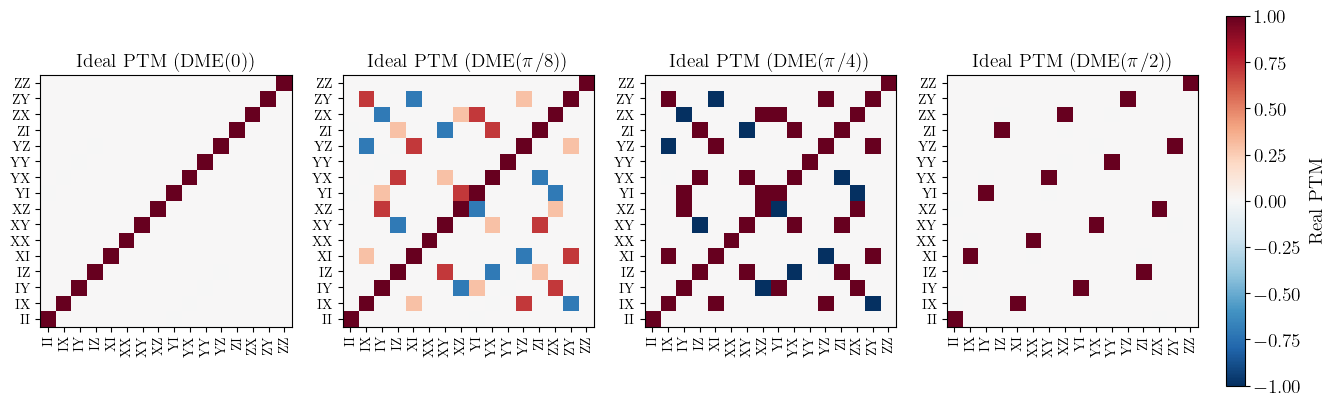

In [4]:
# --- Theta values to sweep over --- #
theta_list = [0, np.pi/8, np.pi/4, np.pi/2]
theta_name = ['0', r'$\pi/8$', r'$\pi/4$', r'$\pi/2$']

# --- Set up figure with 3 subplots --- #
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

for i, theta_ZZ in enumerate(theta_list):
    U_ideal = Qobj(dme_heisenberg(theta_ZZ))
    ptm_ideal = unitary_to_ptm(U_ideal)

    ax = axes[i]
    cax = ax.imshow(ptm_ideal.real, cmap='RdBu_r', norm=Normalize(vmin=-1, vmax=1))
    ax.set_xticks(np.arange(16))
    ax.set_yticks(np.arange(16))
    ax.set_xticklabels(ptm_labels, rotation=90, fontsize=10)
    ax.set_yticklabels(ptm_labels, fontsize=10)
    ax.set_title(f"Ideal PTM (DME({theta_name[i]}))", fontsize=14)
    ax.invert_yaxis()

# Add colorbar to the right of all subplots
fig.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.8, pad=0.02).set_label("Real PTM", fontsize=14)

# plt.tight_layout()
plt.show()

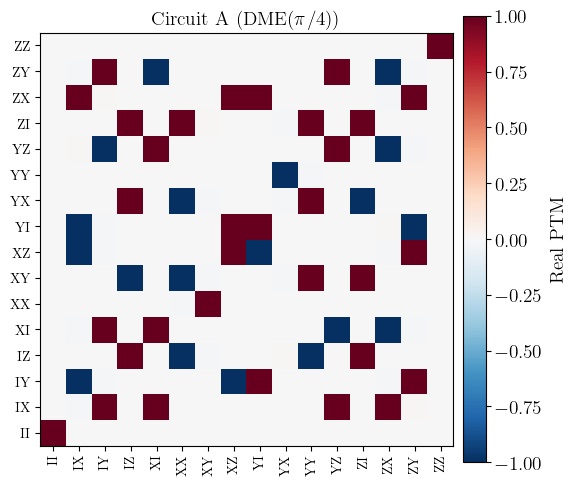

In [5]:
# --- Theta value --- #
theta_ZZ = np.pi/4

# --- Set up figure --- #
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

U_ideal = Qobj(dme_heisenberg(theta_ZZ) @ np.kron(I, RZ(-0.79)))
ptm_ideal = unitary_to_ptm(U_ideal)

cax = ax.imshow(ptm_ideal.real, cmap='RdBu_r', norm=Normalize(vmin=-1, vmax=1))
ax.set_xticks(np.arange(16))
ax.set_yticks(np.arange(16))
ax.set_xticklabels(ptm_labels, rotation=90, fontsize=10)
ax.set_yticklabels(ptm_labels, fontsize=10)
ax.set_title(r"Circuit A (DME($\pi/4$))", fontsize=14)
ax.invert_yaxis()

fig.colorbar(cax, ax=ax, shrink=0.8, pad=0.02).set_label("Real PTM", fontsize=14)
plt.tight_layout()
plt.show()


In [6]:
# --- Theta value --- #
theta_ZZ = np.pi/8

# --- Set up figure --- #
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

U_ideal = Qobj(dme_heisenberg(theta_ZZ) @ np.kron(I, RZ(-np.pi/4)))
ptm_ideal = unitary_to_ptm(U_ideal)

cax = ax.imshow(ptm_ideal.real, cmap='RdBu_r', norm=Normalize(vmin=-1, vmax=1))
ax.set_xticks(np.arange(16))
ax.set_yticks(np.arange(16))
ax.set_xticklabels(ptm_labels, rotation=90, fontsize=10)
ax.set_yticklabels(ptm_labels, fontsize=10)
ax.set_title(r"Circuit B (DME($\pi/8$))", fontsize=14)
ax.invert_yaxis()

fig.colorbar(cax, ax=ax, shrink=0.8, pad=0.02).set_label("Real PTM", fontsize=14)
plt.tight_layout()
plt.show()
